# Exploratory Data Analysis 



__We are provided with two datasets. One which includes features of SME customers in January 2016 as well as the information about whether or not they have churned by March 2016 and another with the prices from 2015 for these customers.
Of particular interest is the review of price sensitivity how it correlates and could possibly be a causative of churn of customers.__

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)



## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. 

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data






It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features. We will begin exploration by first going through the client dataframe before the price dataframe

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

__Statistics__

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [6]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


Gross and net margin on power subscription denoted by features margin_net_pow_ele and margin_gross_pow_ele seem to have the same values. A possible duplication?

In [7]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

Data has been cleaned so we do not need to undergo any data cleaning activities

## Univariate Analysis

Analysis of the individual features of the dataset is necessary to understand their individual data distributions.

* CHANNEL_SALES

This feature represents the specific category of the company's activity. Like we inferred from our business research, the business type or activity is a potential factor affecting its possibility to churn or remain. 

In [8]:
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

By checking unique values, we can tell the activities are encrypted for privacy reasons. However, we seem to have some have data missing denoted with the 'missing' tag. We will visualize the feature to understand the extent of missing data available.

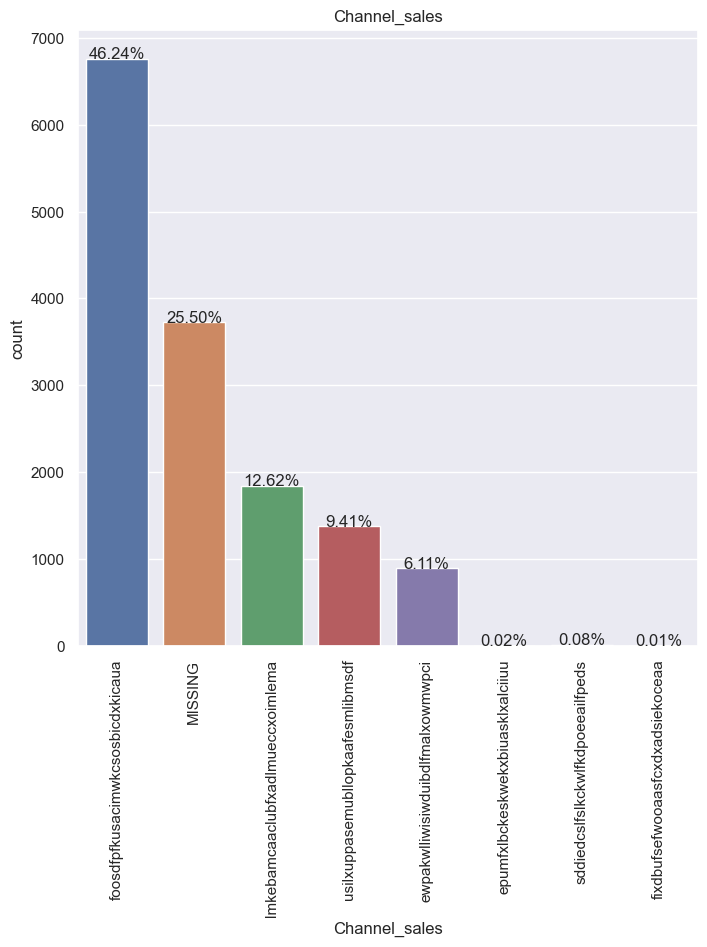

In [9]:
plt.figure(figsize=(8,8))
total=float(len(client_df['channel_sales']))
sen=sns.countplot(x='channel_sales', data=client_df)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Channel_sales')
plt.xlabel('Channel_sales')
plt.xticks(rotation=90)
plt.show()

Interestingly, over 25% of the channel sales features is missing. Quite a good percentage. This would mean we have just under 75% of the data to infer from.

* CONS_12M

Electricity consumption of the past 12 months of each client company. We will visualize the distribution of this feature using a histogram.


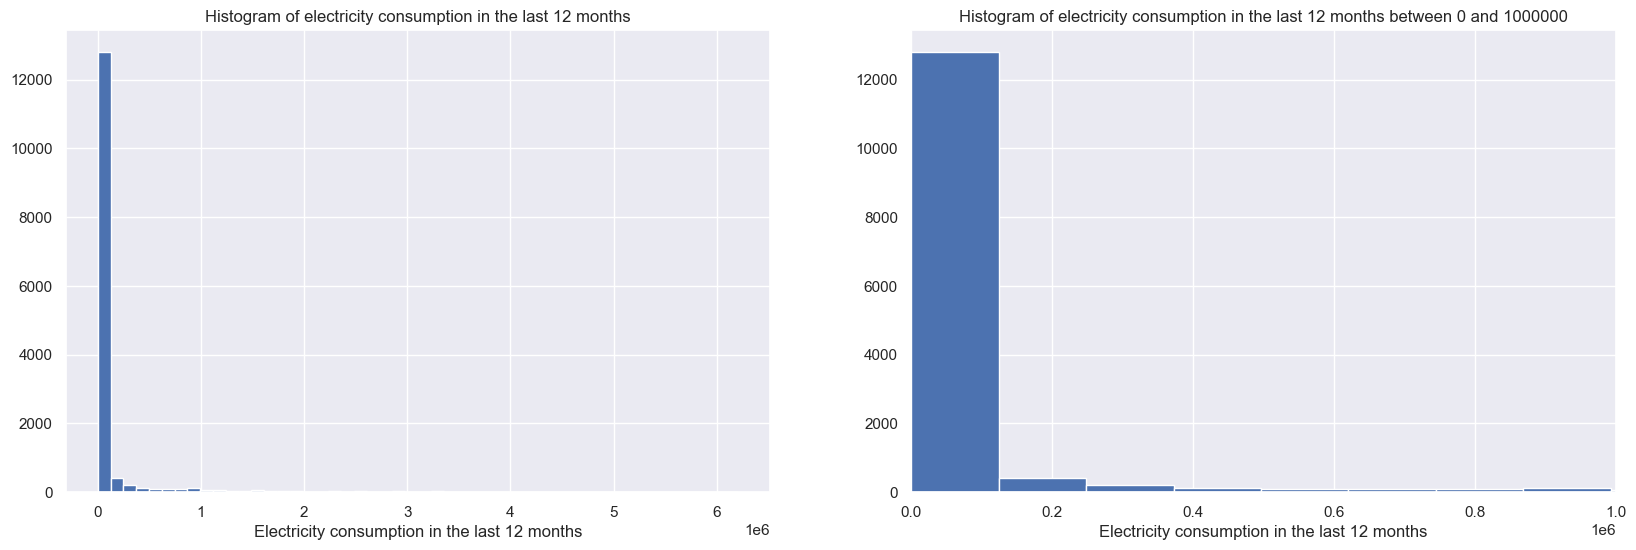

In [10]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
client_df['cons_12m'].hist(bins=50)
plt.title('Histogram of electricity consumption in the last 12 months')
plt.xlabel('Electricity consumption in the last 12 months');

plt.subplot(1,2,2)
client_df['cons_12m'].hist(bins=50)
plt.title('Histogram of electricity consumption in the last 12 months between 0 and 1000000')
plt.xlabel('Electricity consumption in the last 12 months')
plt.xlim((0,1000000));

The feature is right skewed with most client companies consuming  less than 200000 units of electricity in the last 12 months. From our descriptive statistics, the highest electricity consumer used over 6 million units. 

* FORECAST_CONS_12M

Forecasted electricity consumption for the next 12 months 

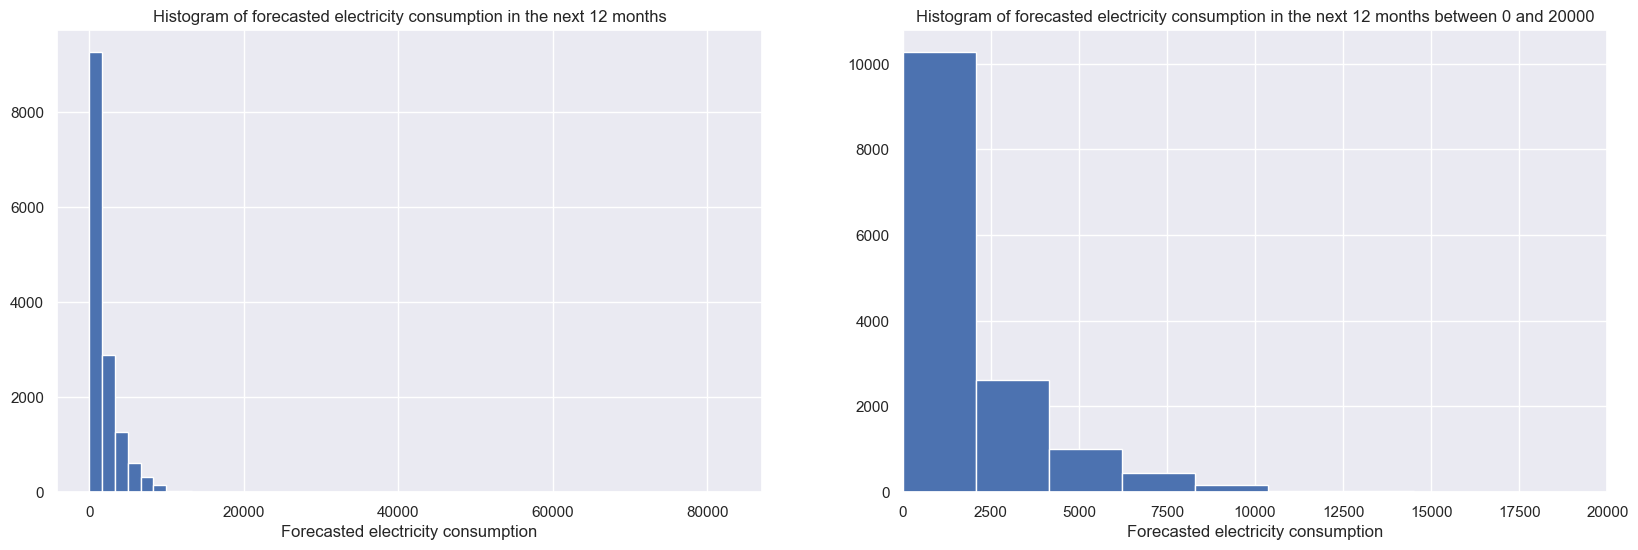

In [11]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
client_df['forecast_cons_12m'].hist(bins=50)
plt.title('Histogram of forecasted electricity consumption in the next 12 months')
plt.xlabel('Forecasted electricity consumption');



plt.subplot(1,2,2)
client_df['forecast_cons_12m'].hist(bins=40)
plt.title('Histogram of forecasted electricity consumption in the next 12 months between 0 and 20000')
plt.xlabel('Forecasted electricity consumption')
plt.xlim((0,20000));

Compared to the consumption recorded in the last 12 months, the forecasted electricity consumption for the next 12 months is really low. Hopefully, we can deduce a reason why

* CONS_GAS_12M

Gas consumption of the past 12 months of each client company. From our descriptive statistics, most of the data provided for this feature is zero which could mean most client companies are not gas consumers. We can run some code to confirm this.

In [12]:
client_df['cons_gas_12m'].value_counts()

0          11994
976731        27
867921        24
41532         18
1959386       18
           ...  
39211          1
92364          1
8905           1
8125           1
47940          1
Name: cons_gas_12m, Length: 2112, dtype: int64

* CONS_LAST_MONTH

Electricity consumption of each client company in the last month

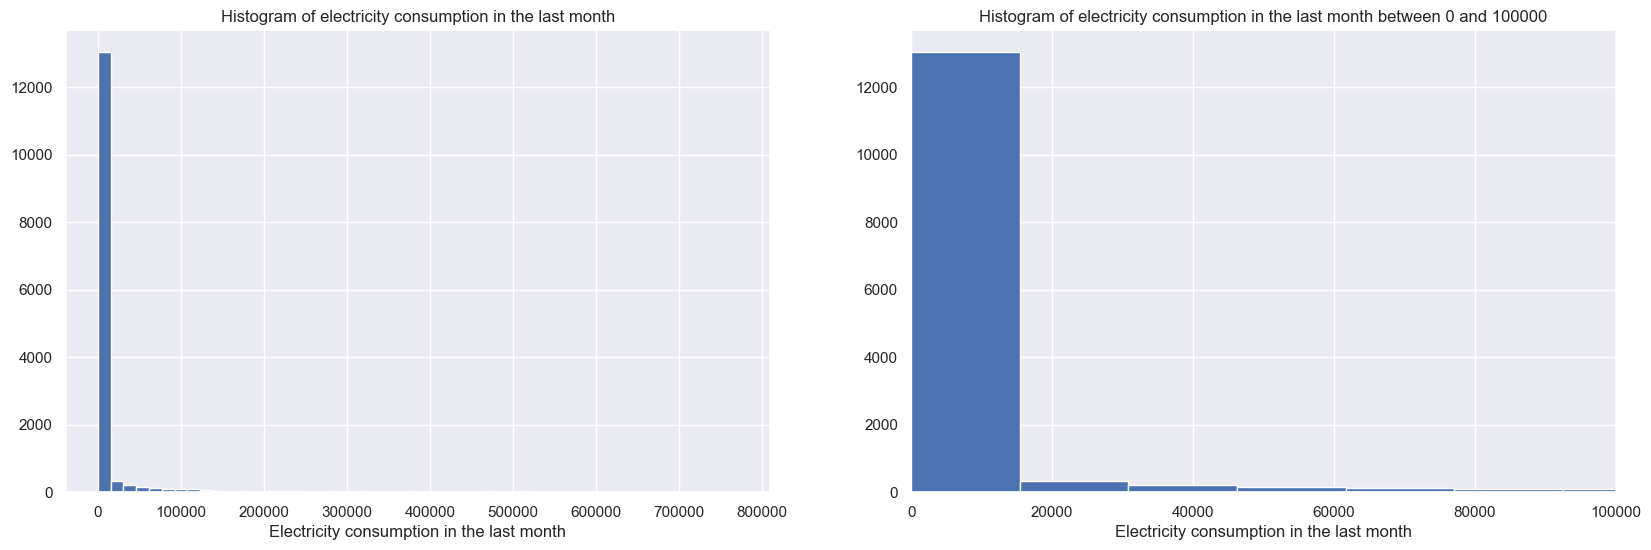

In [13]:
plt.figure(figsize=[20,6])

plt.subplot(1,2,1)
client_df['cons_last_month'].hist(bins=50)
plt.title('Histogram of electricity consumption in the last month')
plt.xlabel('Electricity consumption in the last month');

plt.subplot(1,2,2)
client_df['cons_last_month'].hist(bins=50)
plt.title('Histogram of electricity consumption in the last month between 0 and 100000')
plt.xlabel('Electricity consumption in the last month')
plt.xlim((0,100000));


Most client companies consumed less than 20000 electricity units in the last month.

* FORECAST_DISCOUNT_ENERGY

Forecasted value of current discount


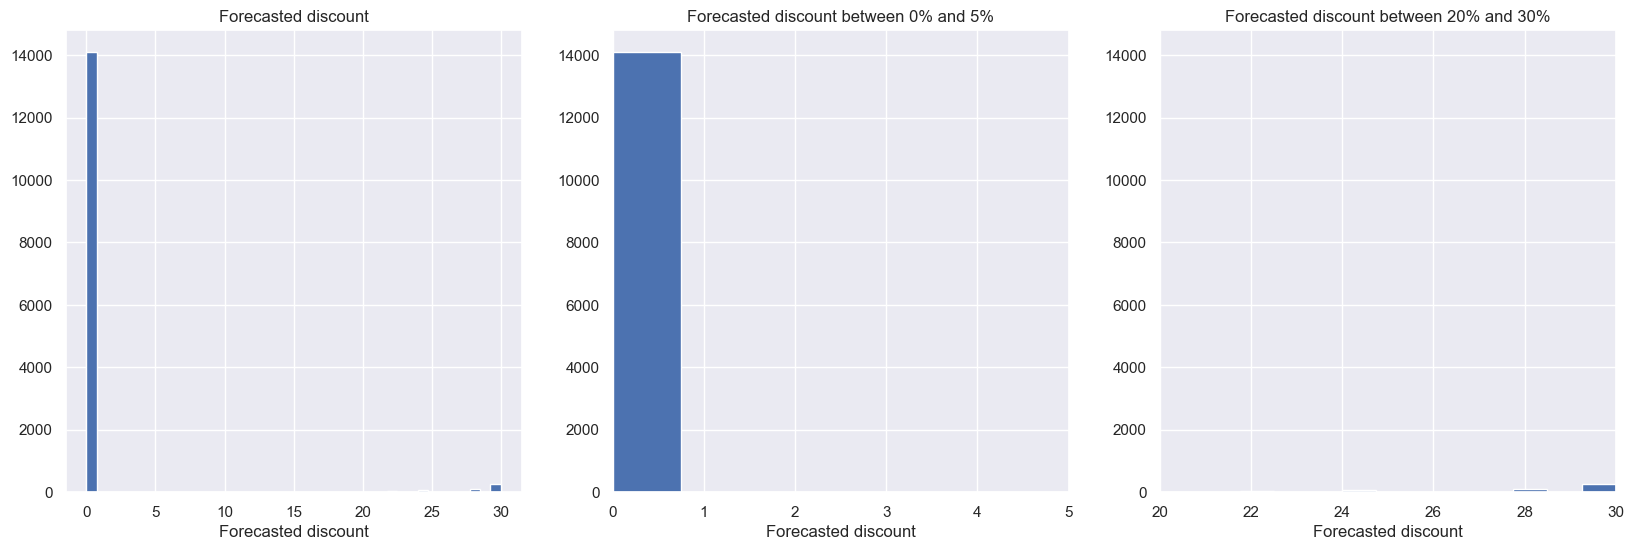

In [14]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
client_df['forecast_discount_energy'].hist(bins=40)
plt.title('Forecasted discount')
plt.xlabel('Forecasted discount');

plt.subplot(1,3,2)
client_df['forecast_discount_energy'].hist(bins=40)
plt.title('Forecasted discount between 0% and 5%')
plt.xlabel('Forecasted discount')
plt.xlim((0,5));


plt.subplot(1,3,3)
client_df['forecast_discount_energy'].hist(bins=40)
plt.title('Forecasted discount between 20% and 30%')
plt.xlabel('Forecasted discount')
plt.xlim((20,30));

Most client companies have a forecasted discount less than 1%, it will be useful to confirm forecasted discount with consumption because as we understood from our business research, discounts are usually offered based on consumption by client companies leading to smaller companies with less consumption not being able to leverage on them.

* HAS_GAS

Indicates if client company is a gas consumer

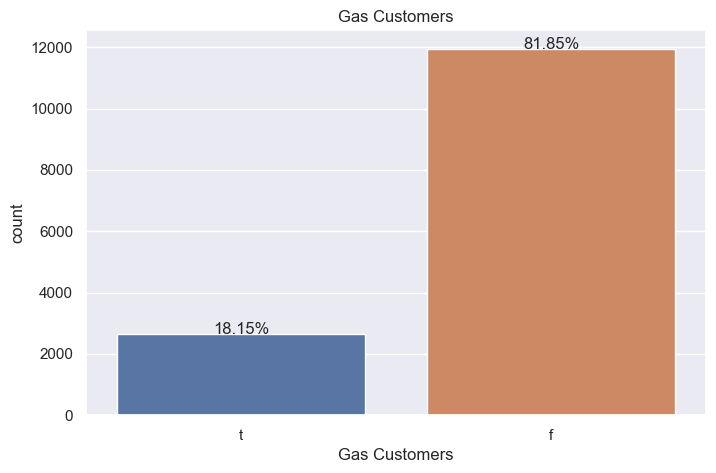

In [15]:
plt.figure(figsize=(8,5))
total=float(len(client_df['has_gas']))
sen=sns.countplot(x='has_gas', data=client_df)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Gas Customers')
plt.xlabel('Gas Customers')
plt.show()

Most client companies are not gas consumers as we had previously seen.

* IMP_CONS 

Current paid consumption of client companies.

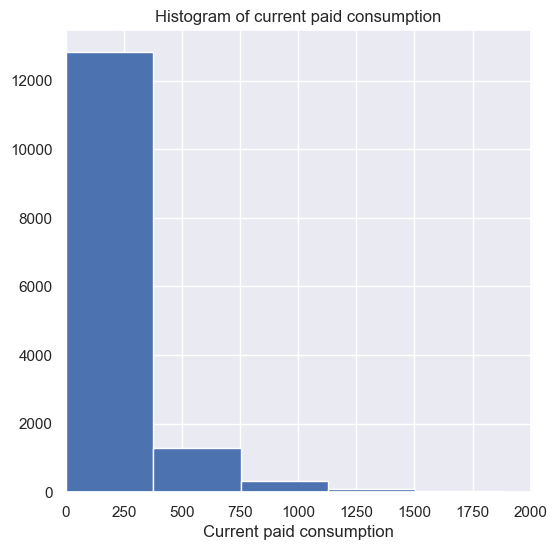

In [16]:
plt.figure(figsize=(6,6))
client_df['imp_cons'].hist(bins=40)
plt.title('Histogram of current paid consumption')
plt.xlabel('Current paid consumption')
plt.xlim((0,2000))
plt.show()

Current paid consumption for most client companies is below 500 units

* NB_PROD_ACT

Number of active products and services for each client company

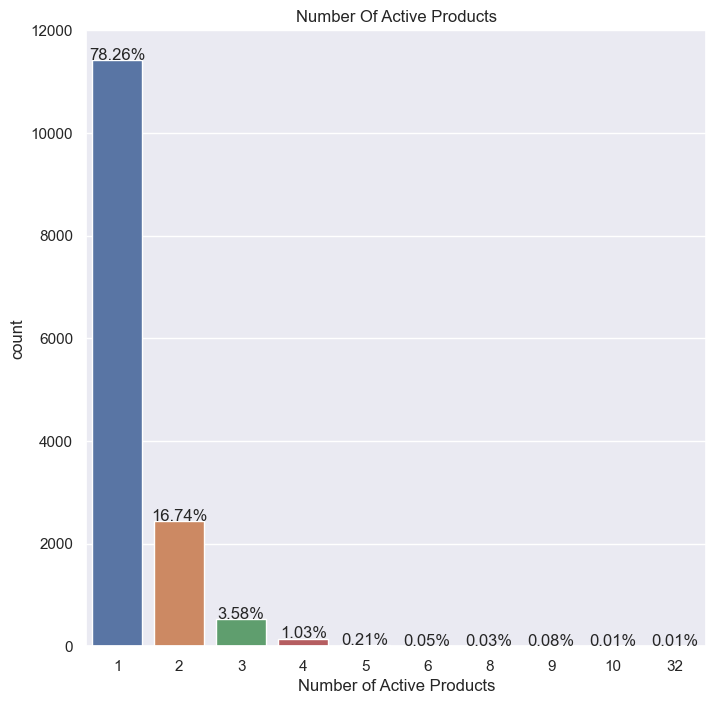

In [17]:
plt.figure(figsize=(8,8))
total=float(len(client_df['nb_prod_act']))
sen=sns.countplot(x='nb_prod_act', data=client_df)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Number Of Active Products')
plt.xlabel('Number of Active Products')
plt.show()

Most client companies have just one active product or service running. It is quite uncertain that PowerCo has up to 32 products being offered to client companies but we will definitely keep an eye out for this.

* NUM_YEARS_ANTIG

Antiquity of client companies (in number of years)

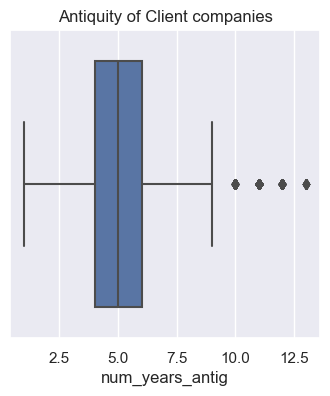

In [18]:
plt.figure(figsize=(4,4))
sns.boxplot(x=client_df['num_years_antig'])
plt.title('Antiquity of Client companies')
plt.show()

Median years of antiquity is 5 years according to the box plot shown.

* ORIGIN_UP

This is the code of the electricity campaign the customer first subscribed to. We can explore how many electricity campaigns there are and see the one with the most subscriptions.

In [19]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

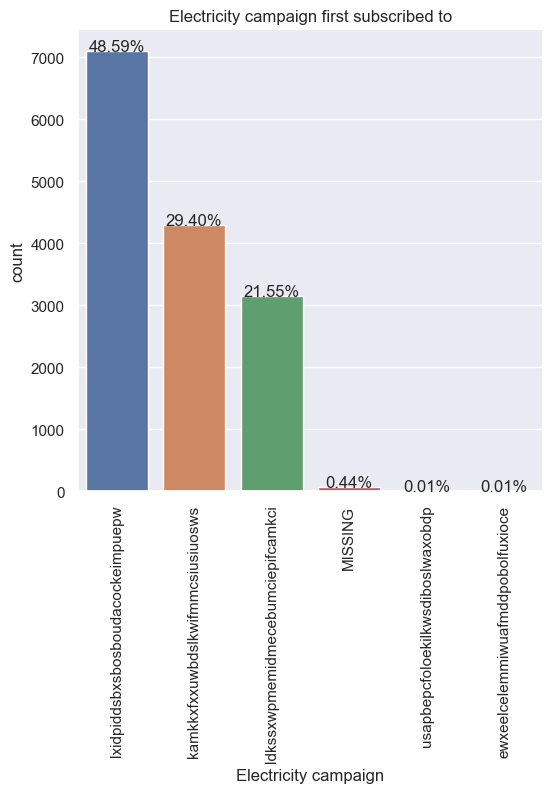

In [20]:
plt.figure(figsize=(6,6))
total=float(len(client_df['origin_up']))
sen=sns.countplot(x='origin_up', data=client_df)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Electricity campaign first subscribed to')
plt.xlabel('Electricity campaign')
plt.xticks(rotation=90)
plt.show()

The electricity campaign first subscribed to might be a factor pointing towards customer satisfaction and service delivery. With close to 50% of the client customers adopting a particular campaign, obviously the campaign offered great incentives and services that most client customers found promising when they started doing business with PowerCo. 

* POW_MAX

This is the power subscription of each client company. 


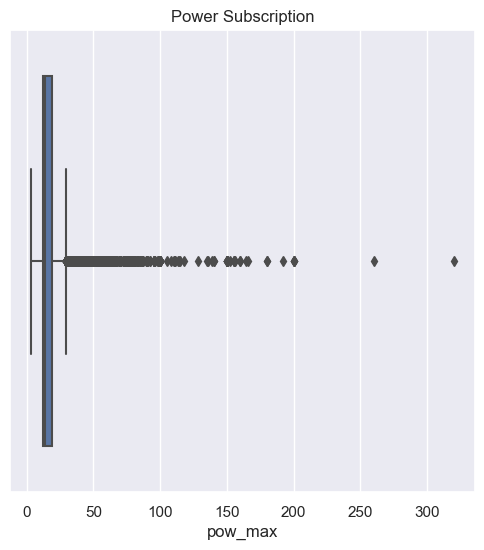

In [21]:
plt.figure(figsize=(6,6))
sns.boxplot(x=client_df['pow_max'])
plt.title('Power Subscription')
plt.show()

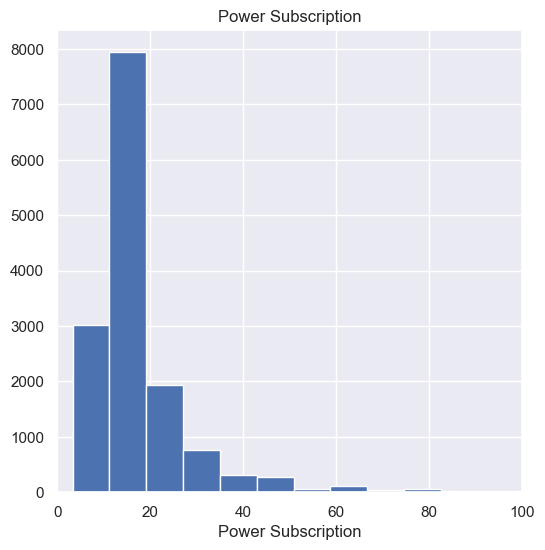

In [22]:
plt.figure(figsize=(6,6))
client_df['pow_max'].hist(bins=40)
plt.title('Power Subscription')
plt.xlabel('Power Subscription')
plt.xlim((0,100))
plt.show()

There is a clear right skew distribution with most client companies having a power subscription less than 20 units.

* CHURN

Whether customer churned by March 2016

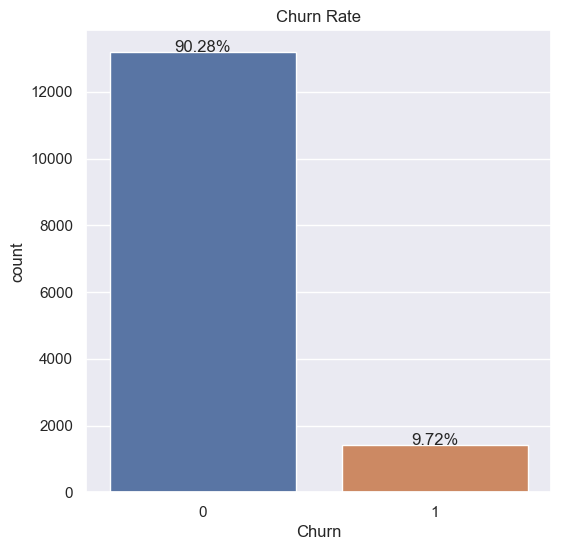

In [23]:
plt.figure(figsize=(6,6))
total=float(len(client_df['churn']))
sen=sns.countplot(x='churn',data=client_df)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.show()

PowerCo seems to have experienced close to 10% churn from January to March 2016 which is more than 1400 customers out of the 14606 instances we are provided with.

## BIVARIATE AND MULTIVARIATE ANALYSIS

We will carry out multivariate analysis to understand the relationships between the variables and possibly deduce information useful in determining whether a client company would churn or not.

We will first use a heatmap to visualize the correlation between all continuous variables in the dataframe.

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_15272\3495189606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(client_df.corr(), annot=True)


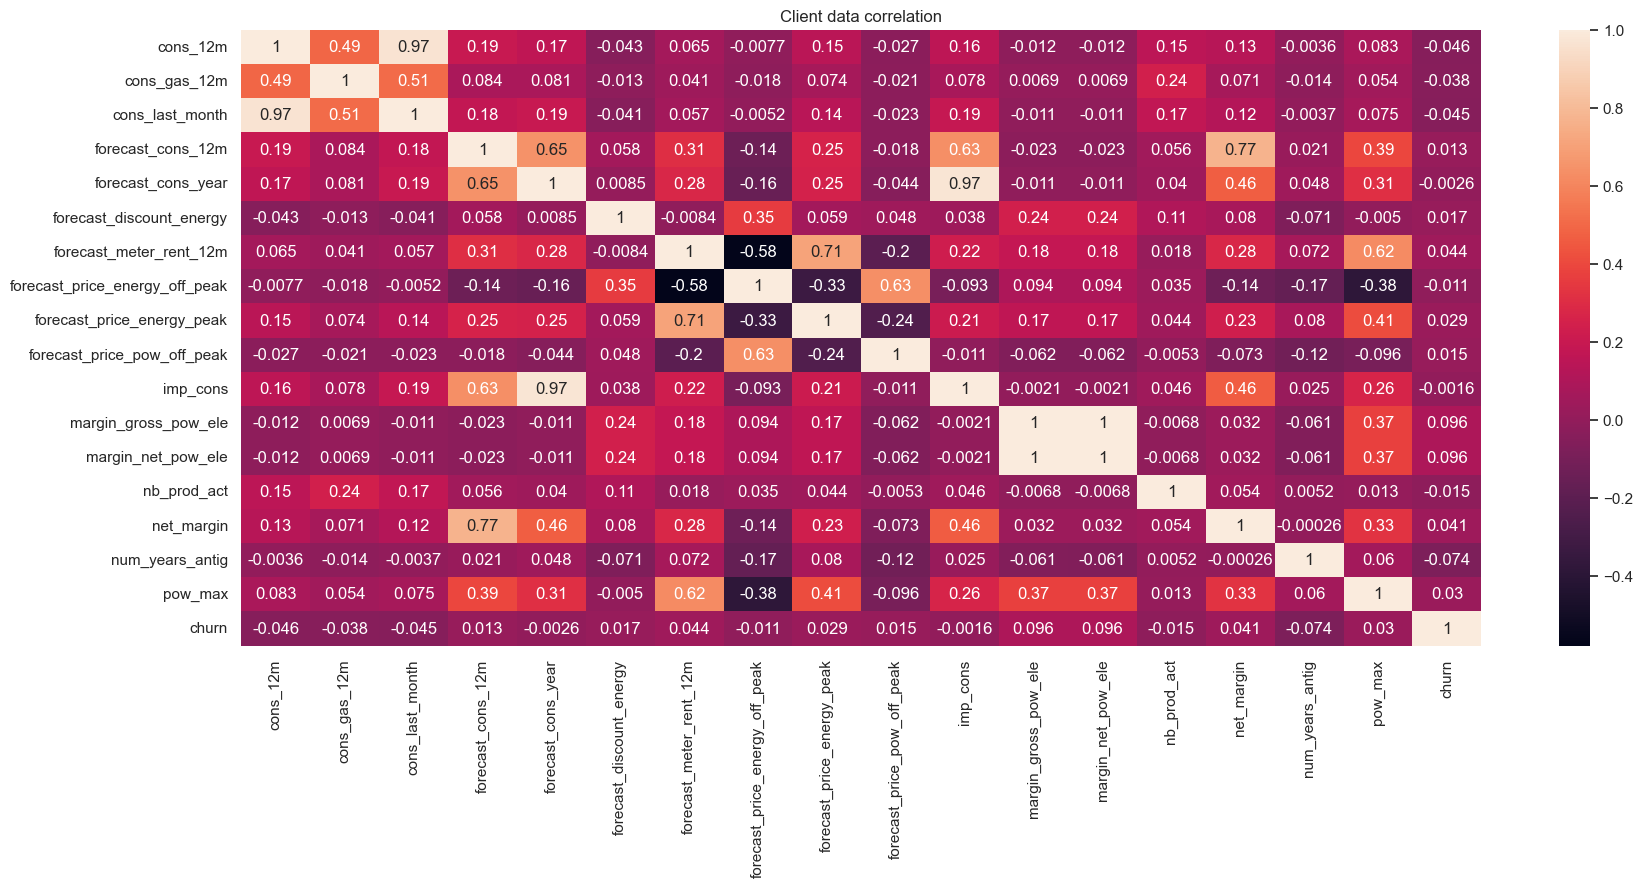

In [24]:
plt.figure(figsize=(20,8))
sns.heatmap(client_df.corr(), annot=True)
plt.title('Client data correlation')
plt.show()

From the heatmap, we can observe the following:
* There is a high positive correlation between the consumption in the last month and the consumption in the last 12 months.
* There is a high positive correlation between the current paid consumption and the forecasted electricity consumption for the next year. This is understandable because it is expected that client companies with high consumption at the certain time would have high consumption in the following year based of current and past consumption. We will have to take note of this when selecting our features because of multicollinearity.
* There is a fair positive correlation between forecasted electricity consumption for next 12 months and net margin.
* Interestingly, there is no noticeable linear correlation between the electricity consumption in the last 12 months and the forecasted electricity consumption for the next 12 months.
* There is a slight positive correlation between the power subscription and the forecast meter rent for the next 12 months.
* Like previously pointed out, the gross margin on power subscription and net margin on power subscription are the same|


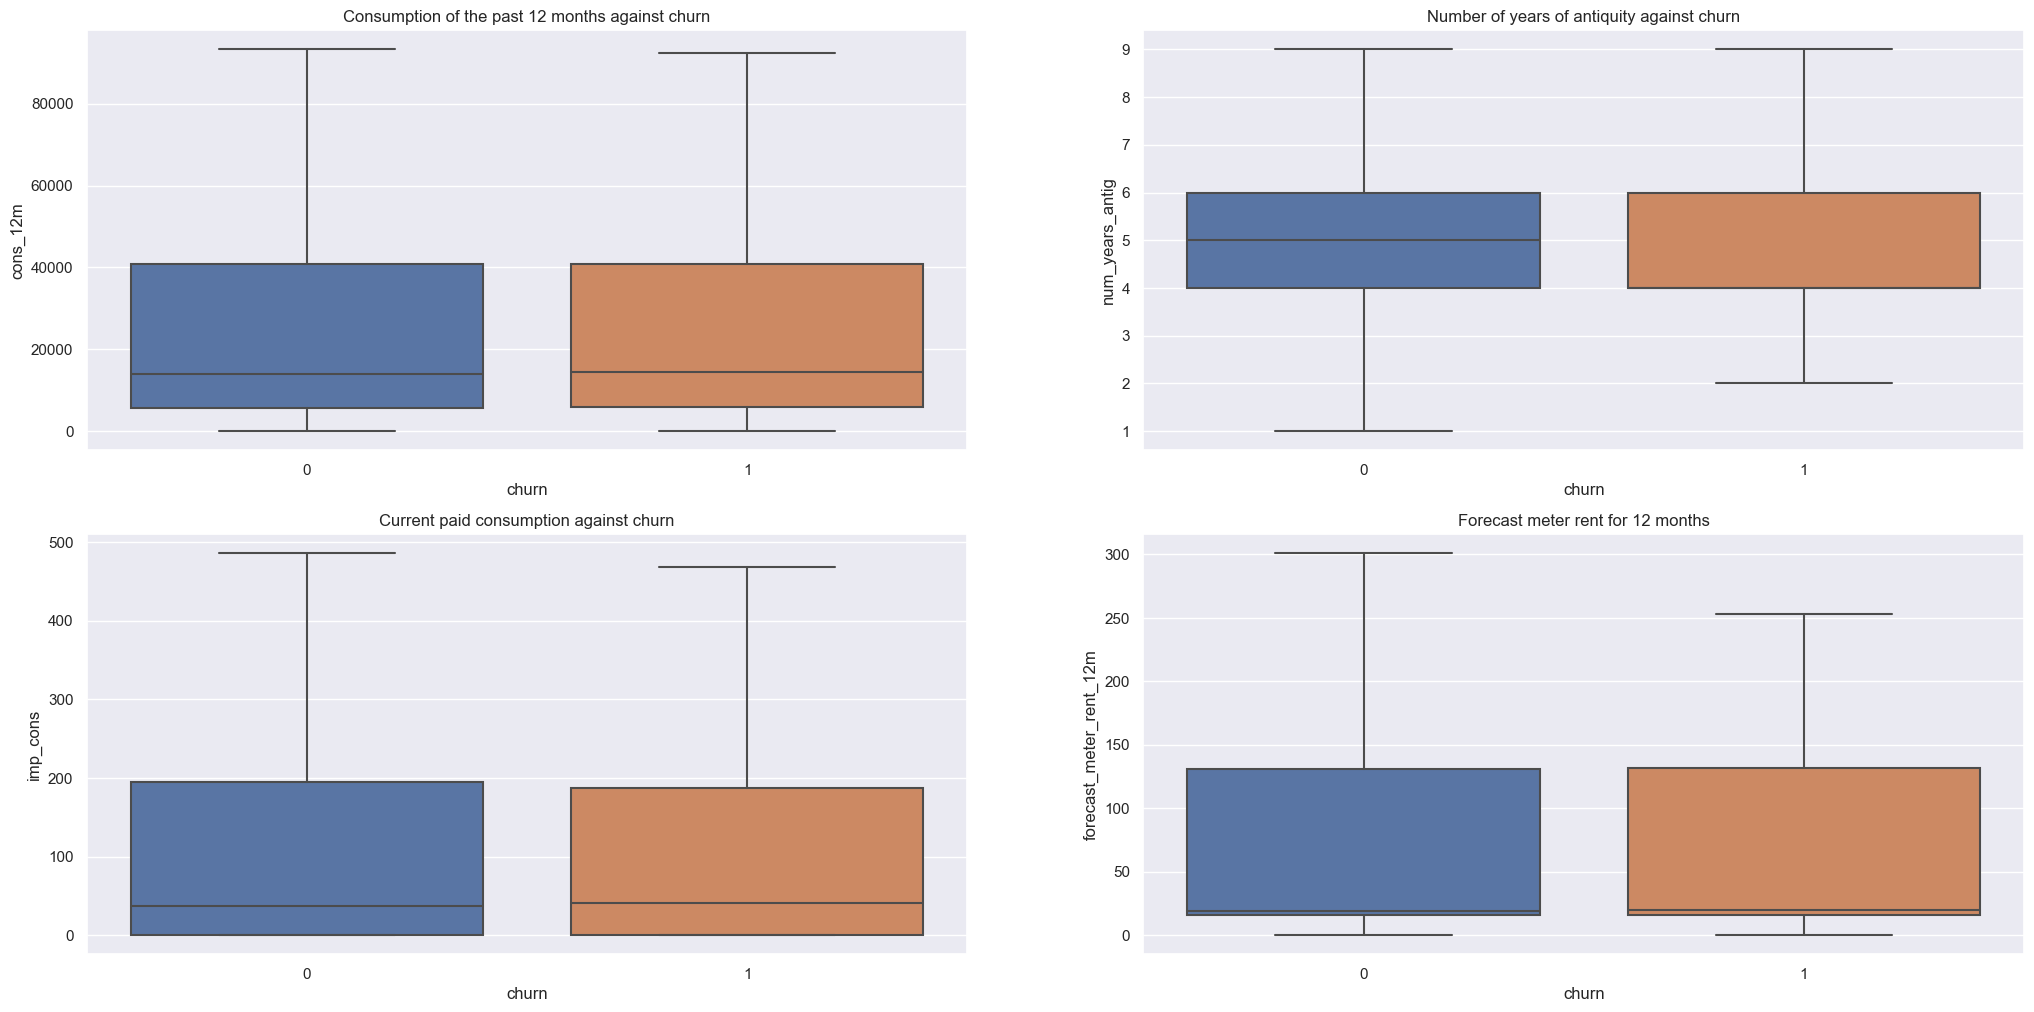

In [25]:
plt.figure(figsize=[25,12])

plt.subplot(2,2,1)
sns.boxplot(data=client_df, x='churn', y='cons_12m', showfliers=False)
plt.title('Consumption of the past 12 months against churn');


plt.subplot(2,2,2)
sns.boxplot(data=client_df, x='churn', y='num_years_antig', showfliers=False)
plt.title('Number of years of antiquity against churn');


plt.subplot(2,2,3)
sns.boxplot(data=client_df, x='churn', y='imp_cons', showfliers=False)
plt.title('Current paid consumption against churn');

plt.subplot(2,2,4)
sns.boxplot(data=client_df, x='churn', y='forecast_meter_rent_12m', showfliers=False)
plt.title('Forecast meter rent for 12 months');




From the boxplots, there doesn't seem to be much of a difference between both groups. Median values are about the same with slight differences in max values. We can make use of violin plots to offer more insights.

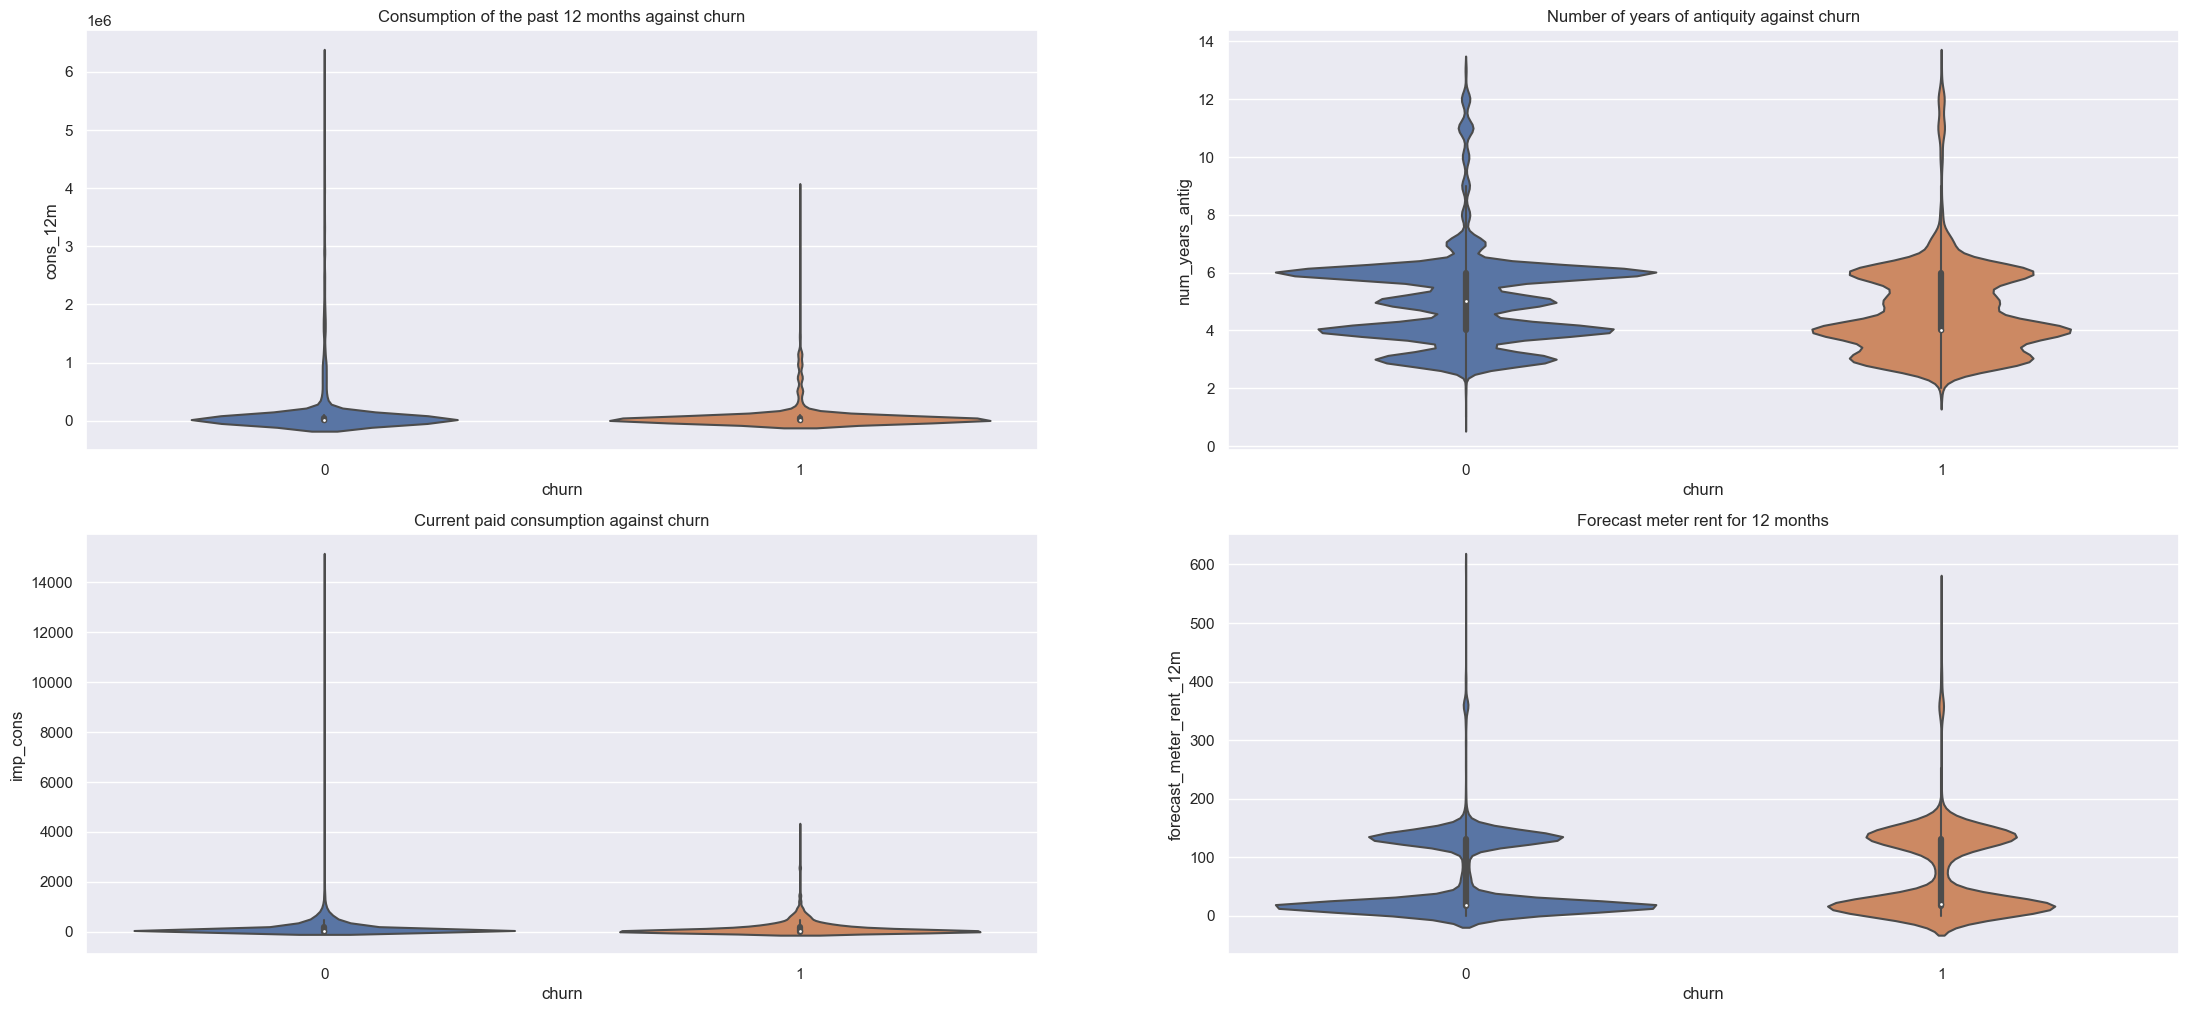

In [26]:
plt.figure(figsize=[27,12])

plt.subplot(2,2,1)
sns.violinplot(data=client_df, x='churn', y='cons_12m')
plt.title('Consumption of the past 12 months against churn');


plt.subplot(2,2,2)
sns.violinplot(data=client_df, x='churn', y='num_years_antig')
plt.title('Number of years of antiquity against churn');


plt.subplot(2,2,3)
sns.violinplot(data=client_df, x='churn', y='imp_cons')
plt.title('Current paid consumption against churn');

plt.subplot(2,2,4)
sns.violinplot(data=client_df, x='churn', y='forecast_meter_rent_12m')
plt.title('Forecast meter rent for 12 months');


Although the plots are quite similar, we can see slight differences in the distributions of data for customers that have churned and those that haven't. 

c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 800x800 with 0 Axes>

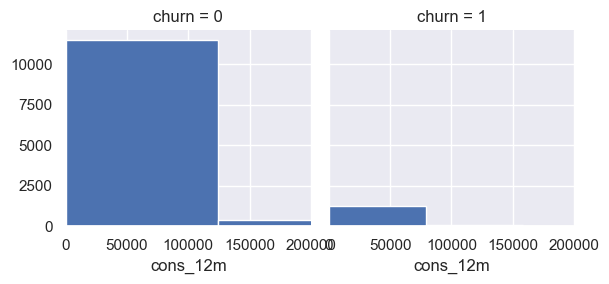

In [27]:
plt.figure(figsize=(8,8))
p=sns.FacetGrid(data=client_df, col='churn')
p.map(plt.hist, 'cons_12m', bins=50)
plt.xlim((0,200000));


Generally, churned client companies have consumed less electricity in the last 12 months than other customers. 

c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 800x800 with 0 Axes>

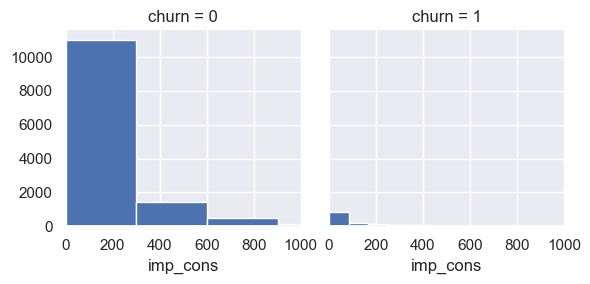

In [28]:
plt.figure(figsize=(8,8))
p=sns.FacetGrid(data=client_df, col='churn')
p.map(plt.hist, 'imp_cons', bins=50)
plt.xlim((0,1000));

Churned client companies current consumption rates are below 200 units. Unlike client companies that have not churned, churned client companies have lower consumption rates.

c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


<Figure size 800x800 with 0 Axes>

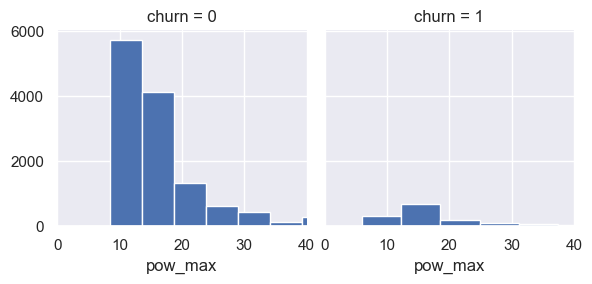

In [29]:
plt.figure(figsize=(8,8))
p=sns.FacetGrid(data=client_df, col='churn')
p.map(plt.hist, 'pow_max', bins=50)
plt.xlim((0,40));

Unlike the churned client companies with the most power subscriptions between 10 and 20 units, client companies that did not churn have a different distribution.

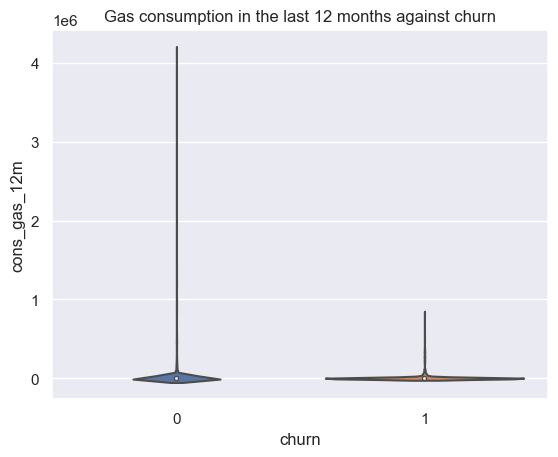

In [30]:
sns.violinplot(data=client_df, x='churn', y='cons_gas_12m')
plt.title('Gas consumption in the last 12 months against churn');

c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\JESSICA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


(0.0, 100000.0)

<Figure size 800x800 with 0 Axes>

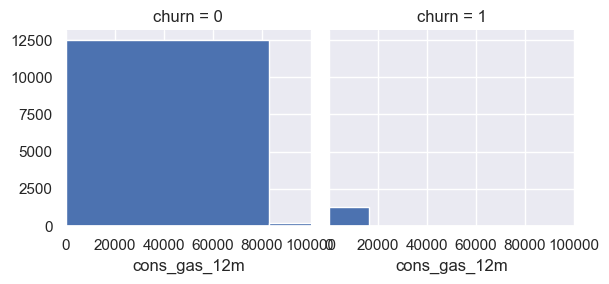

In [31]:
plt.figure(figsize=(8,8))
p=sns.FacetGrid(data=client_df, col='churn')
p.map(plt.hist, 'cons_gas_12m', bins=50)
plt.xlim((0,100000))

Text(0.5, 1.0, 'Consumption in the last month against consumption in the last 12 months')

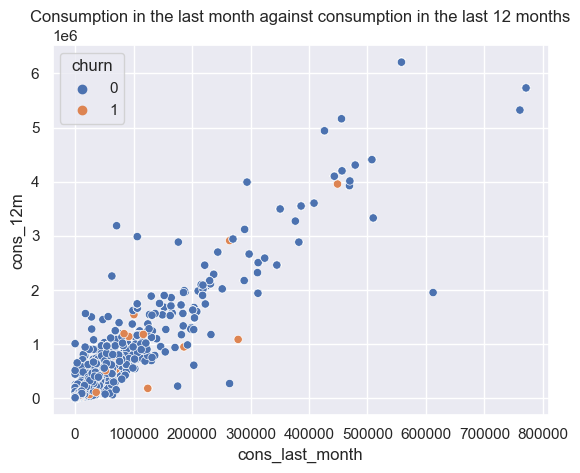

In [32]:
sns.scatterplot(data=client_df, x='cons_last_month', y='cons_12m', hue='churn')
plt.title('Consumption in the last month against consumption in the last 12 months')

* As we earlier saw from the heatmap, there is a strong correlation between the consumption in the last month and that of the previous 12 months. Churn rate is also evident with lower consumption rates.

* From analyses of churn and consumption, it is quite evident churned client companies exhibit low consumption rates in both electricity and gas(for client companies that are also gas customers). 

* It will be useful to see the discount offered to client companies relative to their consumption.

<AxesSubplot: xlabel='forecast_discount_energy', ylabel='cons_12m'>

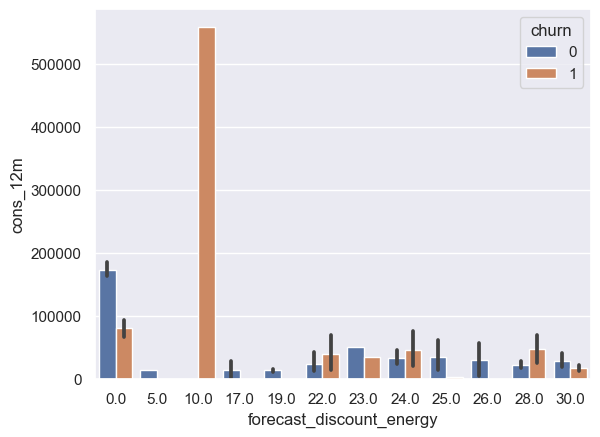

In [33]:
sns.barplot(data=client_df, x='forecast_discount_energy', y='cons_12m', hue='churn')

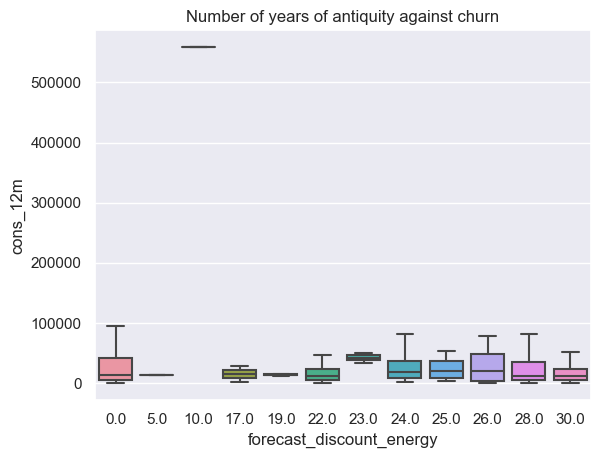

In [34]:
sns.boxplot(data=client_df, x='forecast_discount_energy', y='cons_12m', showfliers=False)
plt.title('Number of years of antiquity against churn');

It would not seem that discount is being offered based on consumption. Various factors add up to determine discount on energy.

Creating a separate dataframe of churned client companies to explore categorical features.

In [35]:
client_churn=client_df[client_df['churn']==1]

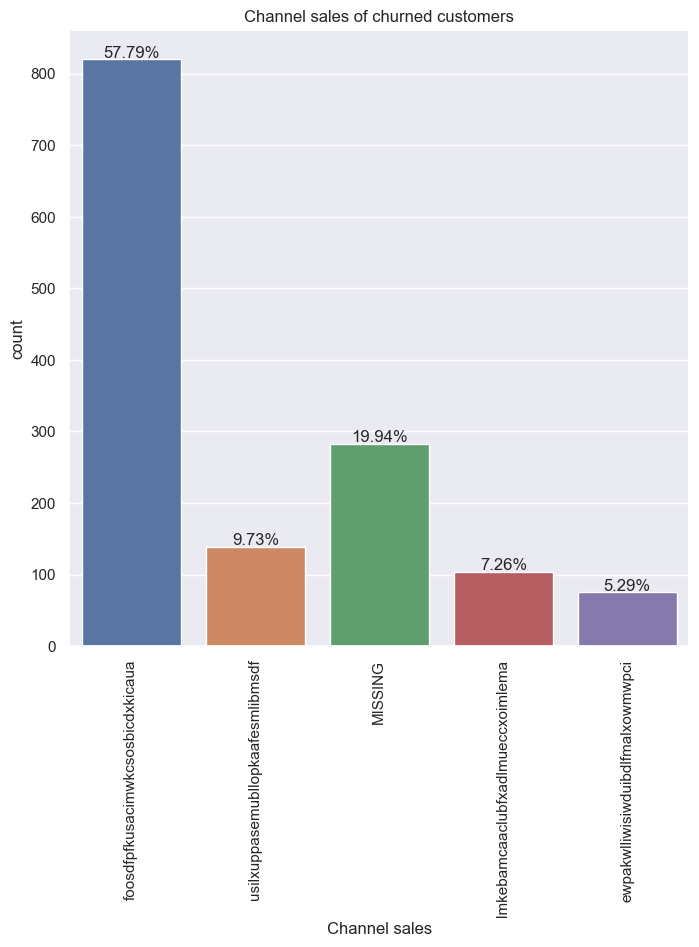

In [36]:
plt.figure(figsize=(8,8))
total=float(len(client_churn['channel_sales']))
sen=sns.countplot(x='channel_sales', data=client_churn)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Channel sales of churned customers')
plt.xlabel('Channel sales')
plt.xticks(rotation=90)
plt.show()

More than 50% of the churned customers use the first channel sale which also had the most users in the general client company population.

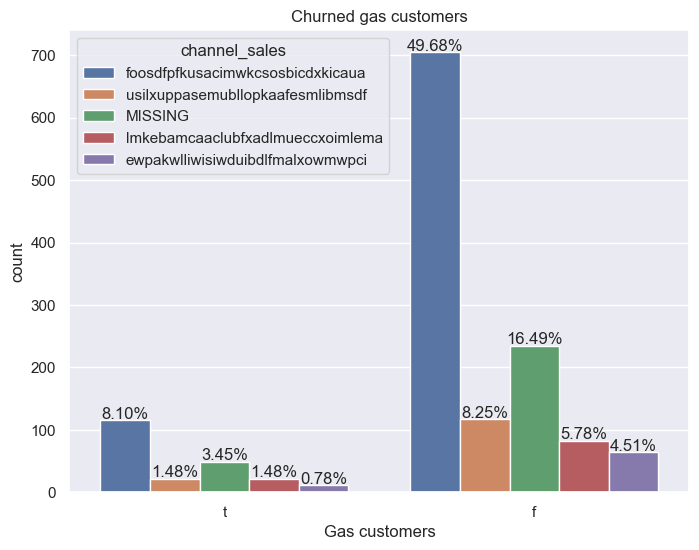

In [37]:
plt.figure(figsize=(8,6))
total=float(len(client_churn['has_gas']))
sen=sns.countplot(x='has_gas', hue='channel_sales', data=client_churn)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Churned gas customers')
plt.xlabel('Gas customers')
plt.show()

Over 15% of the churned client companies are gas customers. Seeing that just over 18% of the total customers are gas customers, about 10% of the gas customers have churned. 

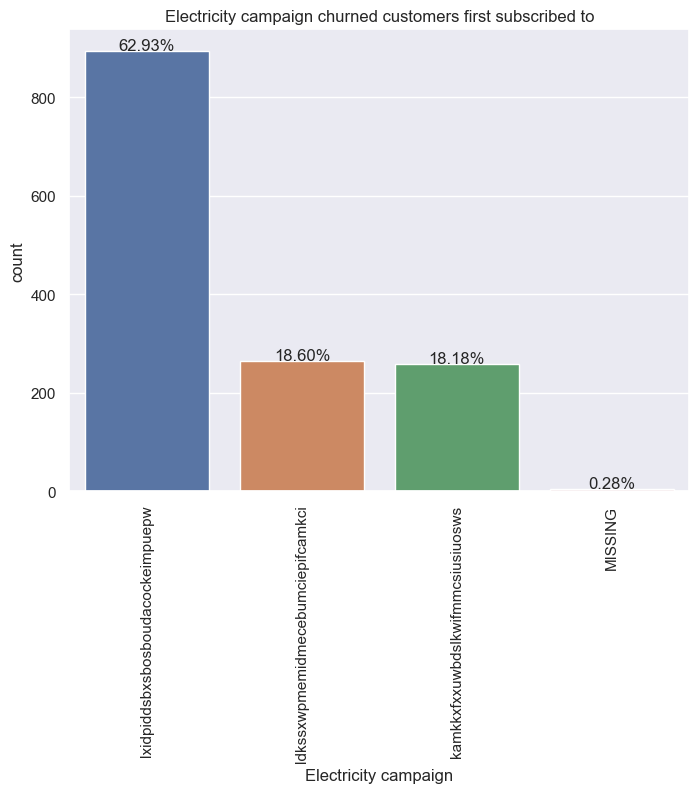

In [38]:
plt.figure(figsize=(8,6))
total=float(len(client_churn['origin_up']))
sen=sns.countplot(x='origin_up', data=client_churn)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Electricity campaign churned customers first subscribed to')
plt.xlabel('Electricity campaign')
plt.xticks(rotation=90)
plt.show()

The electricity campaign with the most churned customers by proportion also happens to be the electricity campaign with the most customers so this is not irregular. 

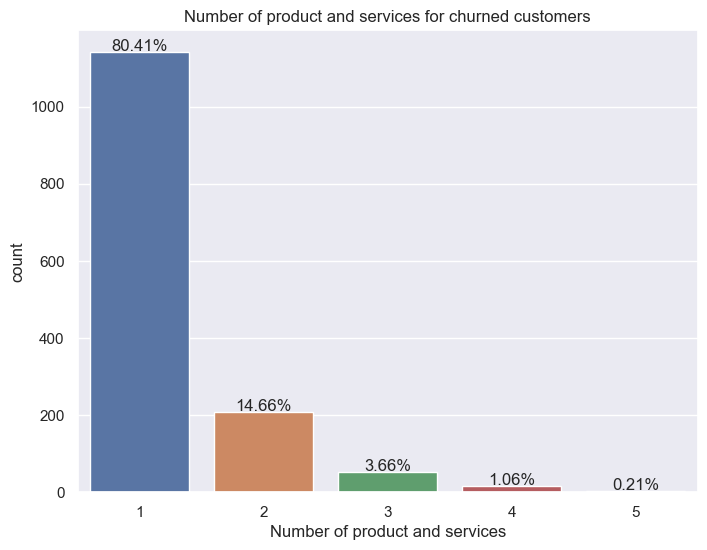

In [39]:
plt.figure(figsize=(8,6))
total=float(len(client_churn['nb_prod_act']))
sen=sns.countplot(x='nb_prod_act', data=client_churn)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Number of product and services for churned customers')
plt.xlabel('Number of product and services')
plt.show()

Price Sensitivity was discussed as a possible factor that affects the churn rate of PowerCo. It would be useful to explore how price of energy and power at various periods affects churn. For this, we will make use of our `price_data.csv`

First, we get some descriptive statistics about `price_data.csv`

`Price_data.csv` shows peak, off peak and mid peak energy and power prices for every month in 2015.

In [40]:
price_df.shape

(193002, 8)

In [41]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [42]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## Creating A Combined Dataframe

Alone, we may not be able to get a lot of information from `price_data.csv`, so we will join it with `client_data.csv`. So we will join both datasets together to create a `combine_df` dataframe.

In [43]:
combine_df=client_df.set_index('id').join(price_df.set_index('id'))
#Exploring one client company from combined dataframe
combine_df.loc['0002203ffbb812588b632b9e628cc38d']



,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-06-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-07-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-08-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,0.0,138.95,0.1169,0.100015,40.606701,f,40.78,43.08,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-09-01,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555


Grouping dataframe by id for each client company and calculating the mean off peak, peak and mid peak energy prices so we can get an idea of data distribution for each variable. 

* PRICE_OFF_PEAK_VAR

Off peak price of energy

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_15272\4164300048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine_df.groupby('id').mean()['price_off_peak_var'].hist(bins=30)


<AxesSubplot: >

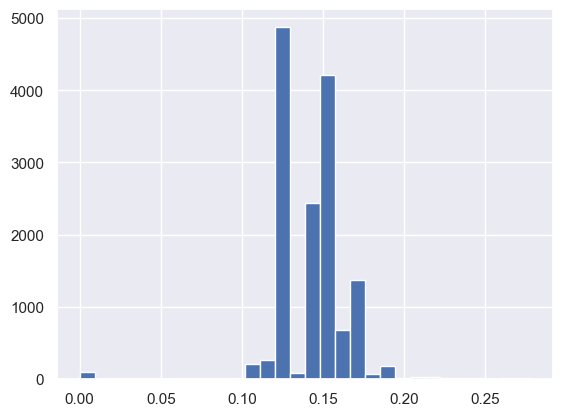

In [44]:
combine_df.groupby('id').mean()['price_off_peak_var'].hist(bins=30)


Off peak price has a bimodal distribution which almost looks normally distributed although there's the presence of an outlier at 0.0

* PRICE_PEAK_VAR

Peak price of energy

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_15272\3428600672.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine_df.groupby('id').mean()['price_peak_var'].hist(bins=30)


Text(0.5, 1.0, 'Histogram of mean peak price price of energy')

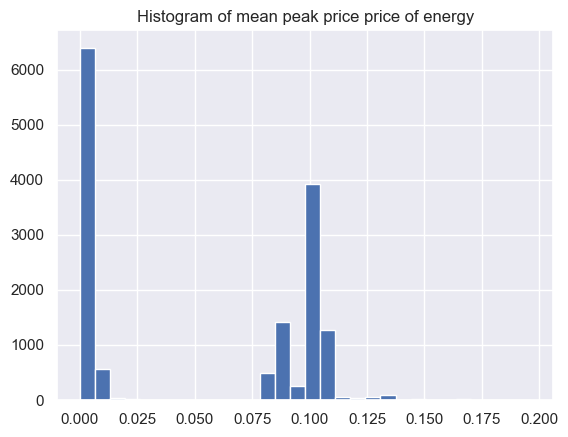

In [45]:
combine_df.groupby('id').mean()['price_peak_var'].hist(bins=30)
plt.title('Histogram of mean peak price price of energy')

Most client companies have a mean peak price of less than 0.025 units. There's also a cluster of caround 0.075 and 0.1 units

* PRICE_MID_PEAK_VAR

Mid peak price of energy

C:\Users\JESSICA\AppData\Local\Temp\ipykernel_15272\3219830578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  combine_df.groupby('id').mean()['price_mid_peak_var'].hist(bins=30)


Text(0.5, 1.0, 'Histogram of mean mid peak price price of energy')

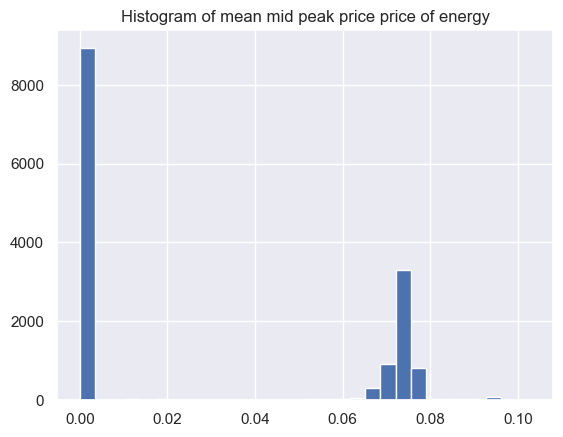

In [46]:
combine_df.groupby('id').mean()['price_mid_peak_var'].hist(bins=30)
plt.title('Histogram of mean mid peak price price of energy')

Quite similar to the peak price, most client companies have a mean mid peak price of 0.0 units.

Exploring the peak, off peak and mid peak energy prices for each month to see how they varied among client companies. 

<Figure size 2000x1000 with 0 Axes>

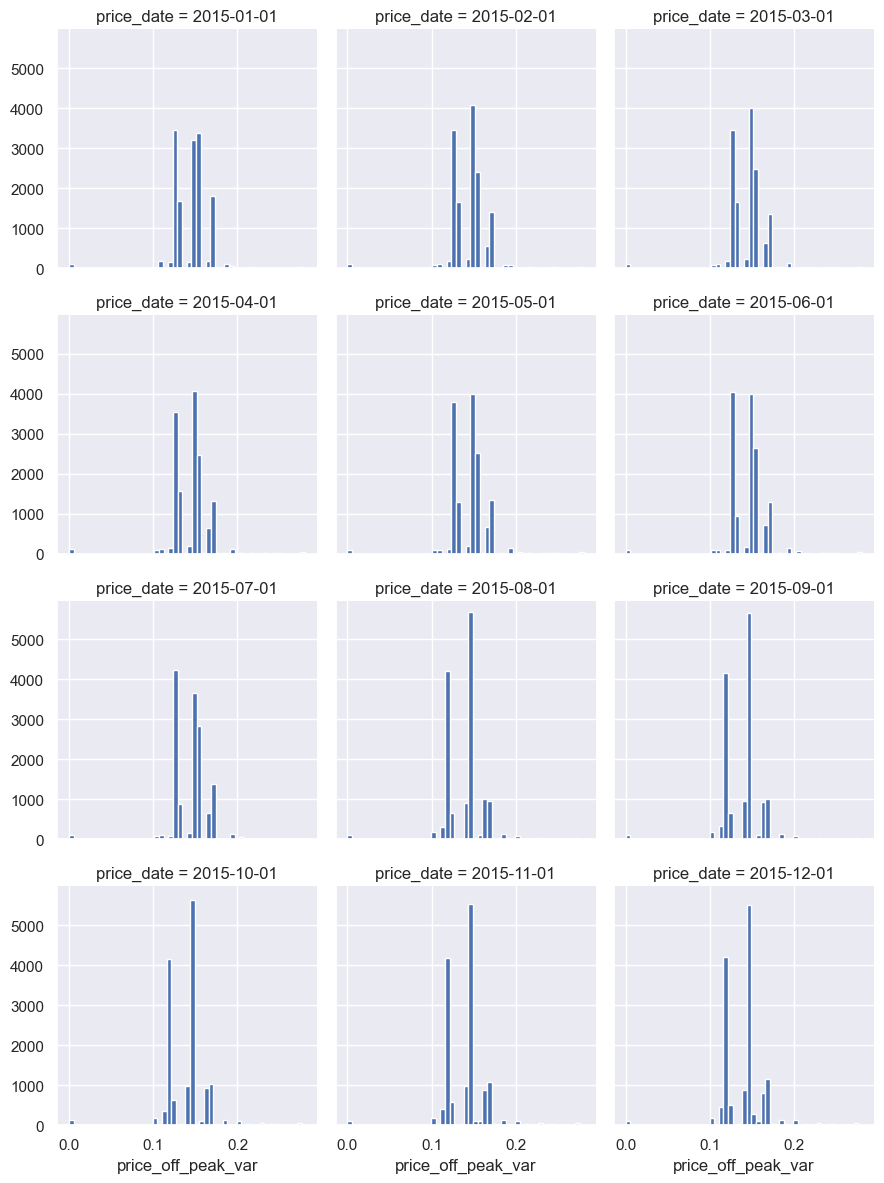

In [47]:
plt.figure(figsize=(20,10))
p=sns.FacetGrid(data=combine_df, col='price_date', col_wrap=3)
p.map_dataframe(plt.hist, 'price_off_peak_var', bins=50)


From the plot, off peak energy prices started increasing for client companies as the months went by. This could be because of weather changes increasing energy consumption in areas leading to higher prices.

<Figure size 2000x1000 with 0 Axes>

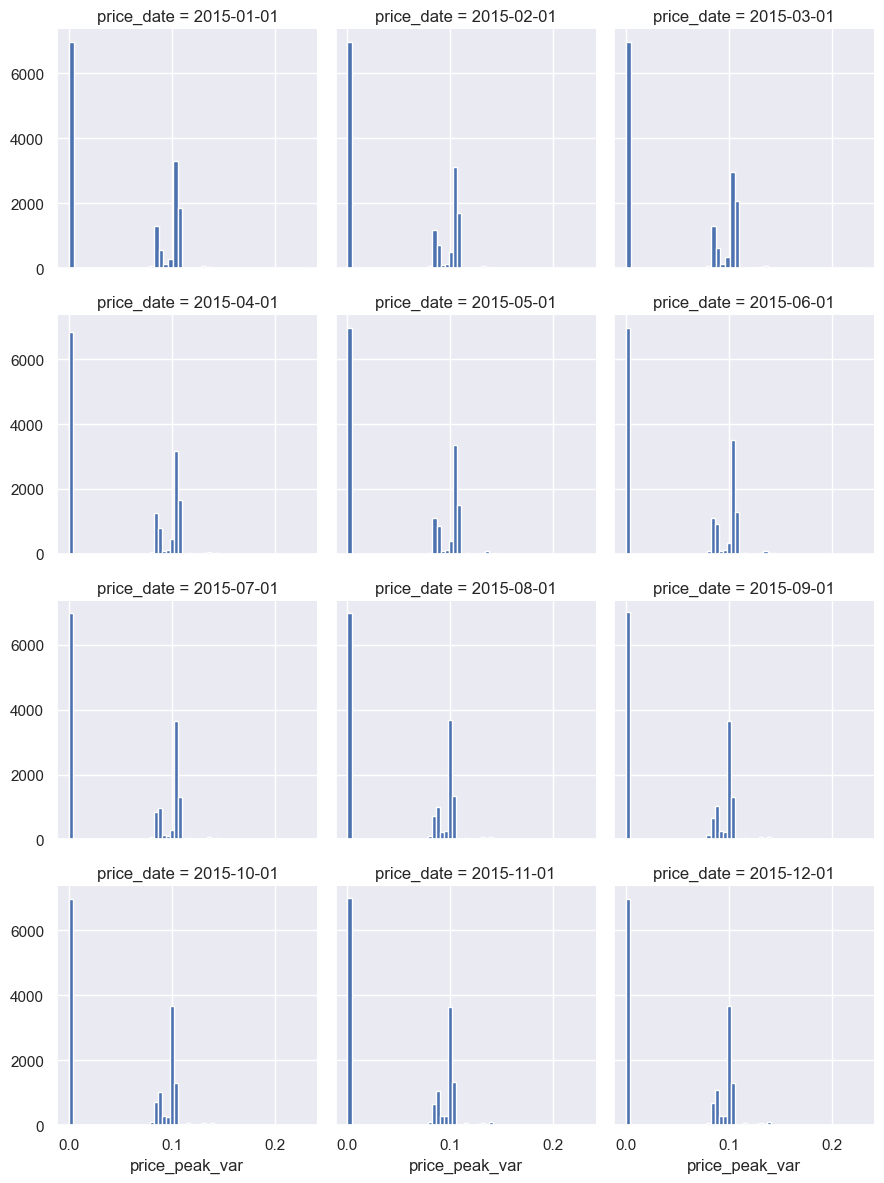

In [48]:
plt.figure(figsize=(20,10))
p=sns.FacetGrid(data=combine_df, col='price_date', col_wrap=3)
p.map_dataframe(plt.hist, 'price_peak_var', bins=50)

From exploring the data, off peak price seems to be generally higher than peak price. From research, peak price is denotes the price of energy at high demand and should be higher than off peak price. A possible error in labeling?

* PRICE_OFF_PEAK_FIX

Off peak price of power 

* PRICE_PEAK_FIX

Peak price of power

* PRICE_MID_PEAK_FIX

Mid peak price of power

<AxesSubplot: >

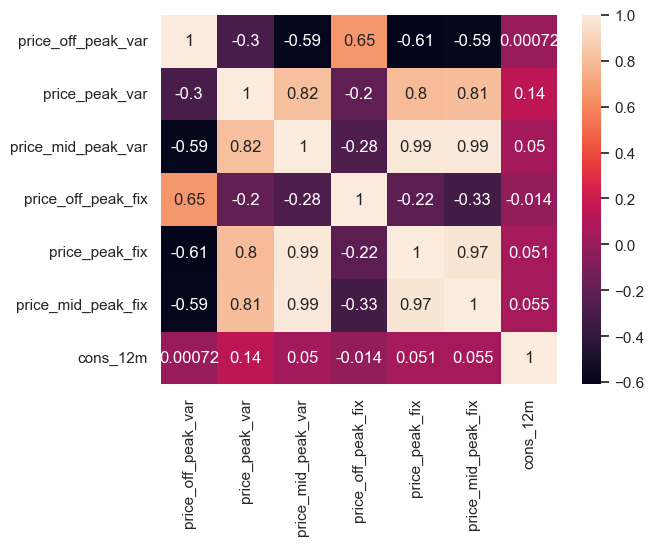

In [49]:
sns.heatmap(combine_df[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var','price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'cons_12m']].corr(), annot=True)

* There is a high positive correlation between mid peak energy price and peak energy price.
* There is a medium negative correlation between off peak energy price and mid peak energy price.
* There is a low negative correlation between peak and off peak energy price.
* Consumption over the 12 months seems to be poorly correlated with the energy prices and power prices.
* Off peak, peak and mid peak power prices of power have a high positive correlation with their corresponding energy prices.

A good idea might be to compare mean energy prices over the year with consumption instead. For this, we will engineer some some new features.

In [50]:
combine_df['mean_offpeak'] = combine_df['price_off_peak_var'].groupby('id').transform('mean')

In [51]:

combine_df['mean_midpeak'] = combine_df['price_mid_peak_var'].groupby('id').transform('mean')
combine_df['mean_peak'] = combine_df['price_peak_var'].groupby('id').transform('mean')


Text(0.5, 1.0, 'Mean  mid peak against Consumption of 12 months')

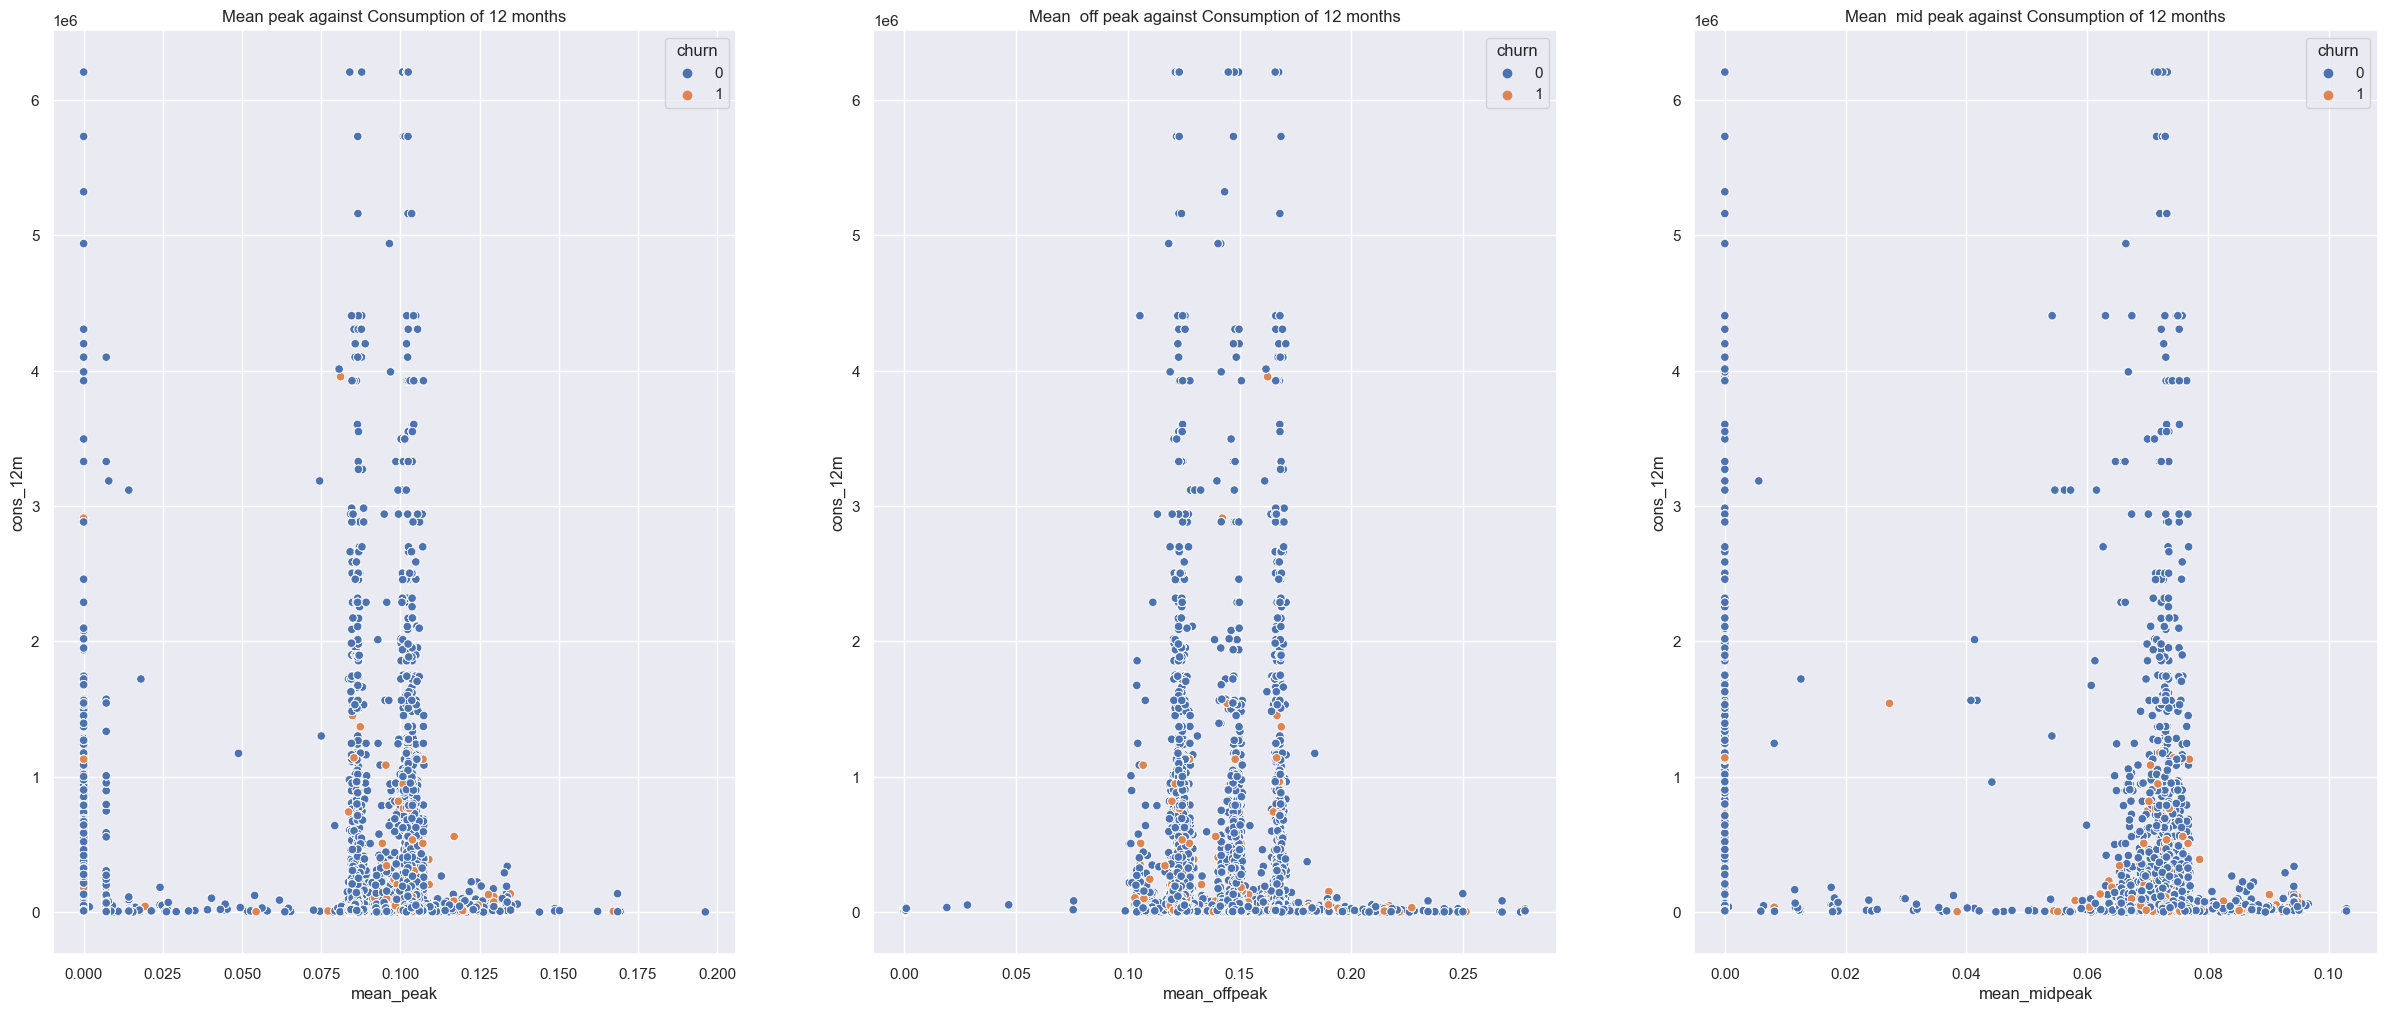

In [52]:

plt.figure(figsize=[30,12])

plt.subplot(1,3,1)
sns.scatterplot(data=combine_df, x='mean_peak', y='cons_12m', hue='churn')
plt.title('Mean peak against Consumption of 12 months')


plt.subplot(1,3,2)
sns.scatterplot(data=combine_df, x='mean_offpeak', y='cons_12m', hue='churn')
plt.title('Mean  off peak against Consumption of 12 months')


plt.subplot(1,3,3)
sns.scatterplot(data=combine_df, x='mean_midpeak', y='cons_12m', hue='churn')
plt.title('Mean  mid peak against Consumption of 12 months')



* From the plot, we can further observe the low consumption of energy by churned client companies. 
*  The Churned client companies are observed to pay high energy prices for low consumption of energy. 
* This observation affirms the notion that price sensitivity may be a reason for churn among client companies. Client companies with low energy consumption are observed to be paying high energy prices at peak, mid peak and off peak periods

In [53]:
combine_df.to_csv('combined_dataset.csv')